In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline     
import seaborn as sns
sns.set(color_codes=True)

from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

df = pd.read_csv('./patient_data.csv')
df.head(5)

,Date,Minimum Air Temperature,Maximum Air Temperature,Relative Humidity (%),Rainfall (mm),Weekday,Weekend,Holiday,Day after holiday,No. of A&E first attendances,total adult patient,Total children patient
0,1/12/2019,17.80,28.05,64,0.0,0,1,1,0,713,3255,256
1,2/12/2019,14.25,20.40,45,0.0,1,0,0,1,797,3269,279
2,3/12/2019,12.75,20.15,34,0.0,1,0,0,0,752,3136,286
3,4/12/2019,13.30,21.45,27,0.0,1,0,0,0,766,3118,265
4,5/12/2019,12.20,17.90,43,1.2,1,0,0,0,782,3104,264


In [2]:
col = ['Minimum Air Temperature','Maximum Air Temperature','Relative Humidity (%)', 'Rainfall (mm)', 'Weekday', 'Weekend', 'Holiday', 'Day after holiday']
X = df[col] 
X.head()

,Minimum Air Temperature,Maximum Air Temperature,Relative Humidity (%),Rainfall (mm),Weekday,Weekend,Holiday,Day after holiday
0,17.80,28.05,64,0.0,0,1,1,0
1,14.25,20.40,45,0.0,1,0,0,1
2,12.75,20.15,34,0.0,1,0,0,0
3,13.30,21.45,27,0.0,1,0,0,0
4,12.20,17.90,43,1.2,1,0,0,0


In [3]:
y_total = df['No. of A&E first attendances']
y_adult = df['total adult patient']
y_children = df['Total children patient']

# This is the linear regression model of total patient 

In [4]:
#THIS is the DEMO of the model with degree 1
poly = PolynomialFeatures(degree = 1) 
polyX = poly.fit_transform(X)


X_train, X_test, y_total_train, y_total_test = train_test_split(polyX, y_total, test_size=0.2, random_state=101)



In [5]:
LR_total = LinearRegression(fit_intercept= True).fit(X_train,y_total_train)
print('Estimated intercept:', LR_total.intercept_)

Estimated intercept: 605.6950277914322


In [6]:
predicted_trained_total_patient = LR_total.predict(X_train)

df_predicted_trained_total_patient = pd.DataFrame(predicted_trained_total_patient,index=list(range(1,len(X_train)+1)),columns = ['predicted_trained_total_patient'])

#----
test_total_patient = LR_total.predict(X_test)
df_test_total_patient = pd.DataFrame(test_total_patient,index=list(range(1,len(X_test)+1)),columns = ['test_total_patient'])
df_predicted_trained_total_patient, df_test_total_patient

(     predicted_trained_total_patient
 1                         654.579269
 2                         686.654685
 3                         681.729399
 4                         579.359833
 5                         645.107613
 ..                               ...
 382                       593.205621
 383                       634.818208
 384                       590.629704
 385                       641.686122
 386                       588.818827
 
 [386 rows x 1 columns],
     test_total_patient
 1           647.754005
 2           482.081663
 3           644.699273
 4           631.204034
 5           637.499897
 ..                 ...
 93          604.337714
 94          684.916530
 95          630.434897
 96          639.212619
 97          647.391168
 
 [97 rows x 1 columns])

In [7]:
ta=r2_score(predicted_trained_total_patient, y_total_train)
te=r2_score(test_total_patient, y_total_test)
print("DEGREE 1"," || Train R-square =", ta, "||Test R-square =",te)

DEGREE 1  || Train R-square = -8.750298378368129 ||Test R-square = -6.302534229653384


In [8]:
eta = mean_squared_error(predicted_trained_total_patient, y_total_train)
ete = mean_squared_error(test_total_patient, y_total_test)
print("DEGREE 1  || Train mse =", eta, "||Test mse =",ete)

DEGREE 1  || Train mse = 11769.33191782971 ||Test mse = 8743.475112753598


In [9]:
#Trying PolynomialFeatures from degree 1 to 10
for i in range(1,11):
    poly = PolynomialFeatures(degree = i) 
    polyX = poly.fit_transform(X)
    X_train, X_test, y_total_train, y_total_test = train_test_split(polyX, y_total, test_size=0.2, random_state=101)
    LR_total = LinearRegression(fit_intercept= True).fit(X_train,y_total_train)
    print('DEGREE', i, 'Estimated intercept:', LR_total.intercept_)
    
    predicted_trained_total_patient = LR_total.predict(X_train)
    test_total_patient = LR_total.predict(X_test)

    ta=r2_score(predicted_trained_total_patient, y_total_train)
    te=r2_score(test_total_patient, y_total_test)
    print("DEGREE", i," || Train R-square =", ta, "||Test R-square =",te)
    
    eta = mean_squared_error(predicted_trained_total_patient, y_total_train)
    ete = mean_squared_error(test_total_patient, y_total_test)
    print("DEGREE", i," || Train mse =", eta, "||Test mse =",ete)
    

DEGREE 1 Estimated intercept: 605.6950277914322
DEGREE 1  || Train R-square = -8.750298378368129 ||Test R-square = -6.302534229653384
DEGREE 1  || Train mse = 11769.33191782971 ||Test mse = 8743.475112753598
DEGREE 2 Estimated intercept: -2971611653609.4263
DEGREE 2  || Train R-square = -1.451560986629338 ||Test R-square = -0.9250769163939196
DEGREE 2  || Train mse = 12698.798503473632 ||Test mse = 13150.82079069639
DEGREE 3 Estimated intercept: -88823136260.92815
DEGREE 3  || Train R-square = 0.015562566988806092 ||Test R-square = -0.013905847984433617
DEGREE 3  || Train mse = 38279.08710540445 ||Test mse = 30469009.21715103
DEGREE 4 Estimated intercept: 685.9148194381094
DEGREE 4  || Train R-square = 0.28950791028478406 ||Test R-square = -0.004476580833108645
DEGREE 4  || Train mse = 5390.047532076787 ||Test mse = 8014579088.501135
DEGREE 5 Estimated intercept: 178547.8926832337
DEGREE 5  || Train R-square = 0.6515147533590302 ||Test R-square = -0.010360840157110252
DEGREE 5  || Trai

DEGREE 2 Estimated intercept: -2971611653609.4263


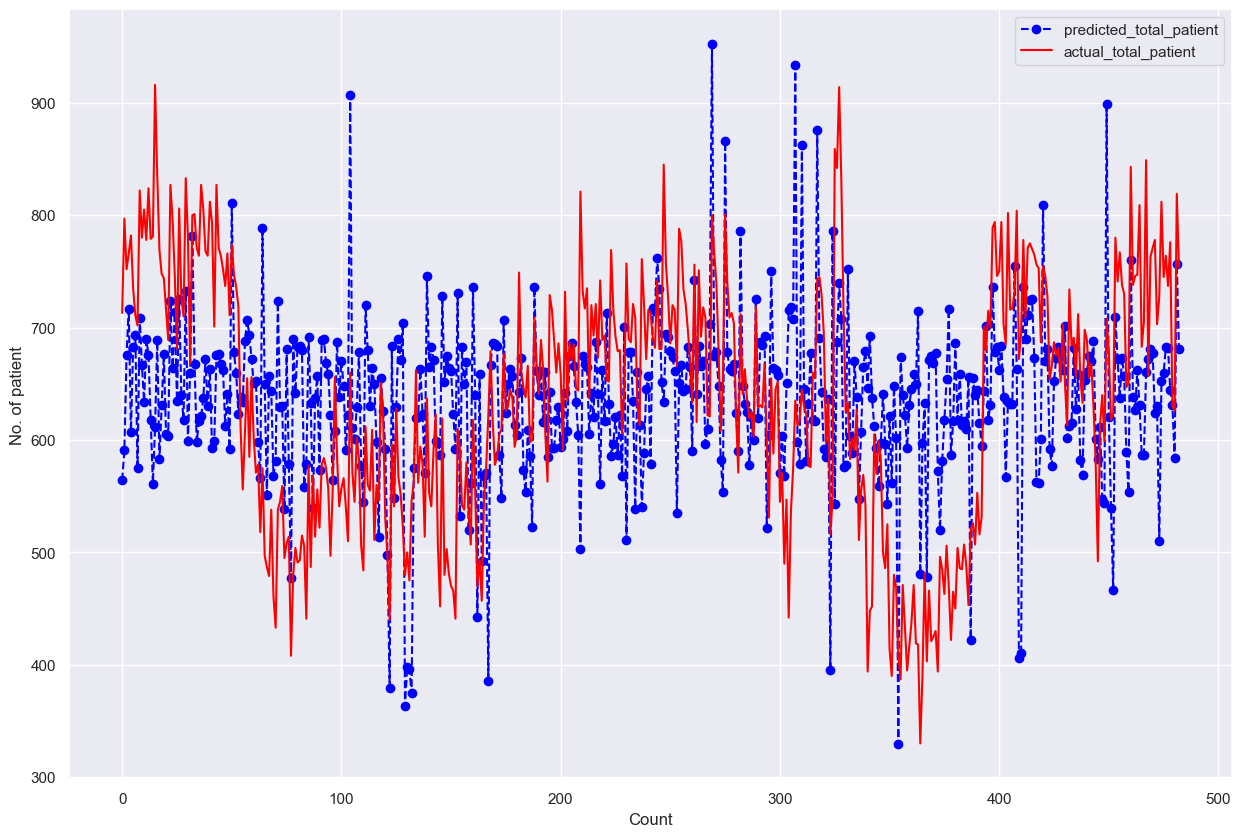

In [10]:
#show the result of degree 2
poly = PolynomialFeatures(degree = 2) 
polyX = poly.fit_transform(X)
X_train, X_test, y_total_train, y_total_test = train_test_split(polyX, y_total, test_size=0.2, random_state=101)
LR_total = LinearRegression(fit_intercept= True).fit(X_train,y_total_train)
print('DEGREE', 2, 'Estimated intercept:', LR_total.intercept_)

    
predicted_total_patient = LR_total.predict(polyX)
df_predicted_total_patient = pd.DataFrame(predicted_total_patient,index=y_total.index,columns = ['predicted_total_patient'])

df_predicted_total_patient.plot(figsize=(15,10), color='blue', marker='o', linestyle='dashed')
y_total.plot(color='red')

plt.legend(['predicted_total_patient','actual_total_patient'])  
plt.xlabel("Count")  
plt.ylabel("No. of patient") 
plt.show()

In [11]:
print("Degree 2")
new_df = pd.DataFrame()
new_df['actual_total_patient'] = list(y_total)
new_df['predicted_total_patient'] = predicted_total_patient
new_df.head()

Degree 2


,actual_total_patient,predicted_total_patient
0,713,564.128418
1,797,590.872559
2,752,675.731445
3,766,716.884766
4,782,607.212402


In [12]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_total_train,X_train_Sm).fit()
print(ls.summary())

                                 OLS Regression Results                                 
Dep. Variable:     No. of A&E first attendances   R-squared:                       0.235
Model:                                      OLS   Adj. R-squared:                  0.156
Method:                           Least Squares   F-statistic:                     2.980
Date:                          Fri, 05 May 2023   Prob (F-statistic):           1.22e-07
Time:                                  02:40:11   Log-Likelihood:                -2323.9
No. Observations:                           386   AIC:                             4722.
Df Residuals:                               349   BIC:                             4868.
Df Model:                                    36                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

# Below is the linear regression of adult patient

In [13]:
#THIS is the DEMO of the model with degree 1
poly = PolynomialFeatures(degree = 1) 
polyX = poly.fit_transform(X)

X_train, X_test, y_adult_train, y_adult_test = train_test_split(polyX, y_adult, test_size=0.2, random_state=101)

In [14]:
LR_adult = LinearRegression(fit_intercept= True).fit(X_train,y_adult_train)
print('Estimated intercept:', LR_adult.intercept_)


Estimated intercept: 2612.917841124241


In [15]:
predicted_trained_adult_patient = LR_adult.predict(X_train)

df_predicted_trained_adult_patient = pd.DataFrame(predicted_trained_adult_patient,index=list(range(1,len(X_train)+1)),columns = ['predicted_trained_adult_patient'])

#----
test_adult_patient = LR_adult.predict(X_test)
df_test_adult_patient = pd.DataFrame(test_adult_patient,index=list(range(1,len(X_test)+1)),columns = ['test_adult_patient'])
df_predicted_trained_adult_patient, df_test_adult_patient

(     predicted_trained_adult_patient
 1                        2788.163230
 2                        2806.369814
 3                        2826.254473
 4                        2790.896282
 5                        2802.361277
 ..                               ...
 382                      2780.574098
 383                      2686.823960
 384                      2791.678403
 385                      2803.292889
 386                      2778.015499
 
 [386 rows x 1 columns],
     test_adult_patient
 1          2798.755174
 2          2444.542115
 3          2803.668116
 4          2825.320912
 5          2804.977766
 ..                 ...
 93         2700.134339
 94         2816.190809
 95         2816.696119
 96         2825.393345
 97         2802.150133
 
 [97 rows x 1 columns])

In [16]:
ta=r2_score(predicted_trained_adult_patient, y_adult_train)
te=r2_score(test_adult_patient, y_adult_test)
print("DEGREE 1"," || Train R-square =", ta, "||Test R-square =",te)

DEGREE 1  || Train R-square = -22.763614725457902 ||Test R-square = -25.75241173690267


In [17]:
eta = mean_squared_error(predicted_trained_adult_patient, y_adult_train)
ete = mean_squared_error(test_adult_patient, y_adult_test)
print("DEGREE 1"," || Train mse =", eta, "||Test mse =",ete)

DEGREE 1  || Train mse = 69148.91657507155 ||Test mse = 81448.62482740686


In [18]:
#Trying PolynomialFeatures from degree 1 to 10
for i in range(1,11):
    poly = PolynomialFeatures(degree = i) 
    polyX = poly.fit_transform(X)
    X_train, X_test, y_adult_train, y_adult_test = train_test_split(polyX, y_adult, test_size=0.2, random_state=101)
    LR_adult = LinearRegression(fit_intercept= True).fit(X_train,y_adult_train)
    print('DEGREE', i, 'Estimated intercept:', LR_adult.intercept_)
    
    predicted_trained_adult_patient = LR_adult.predict(X_train)
    test_adult_patient = LR_adult.predict(X_test)
    
    ta=r2_score(predicted_trained_adult_patient, y_adult_train)
    te=r2_score(test_adult_patient, y_adult_test)
    print("DEGREE", i," || Train R-square =", ta, "||Test R-square =",te)
    
    eta = mean_squared_error(predicted_trained_adult_patient, y_adult_train)
    ete = mean_squared_error(test_adult_patient, y_adult_test)
    print("DEGREE", i," || Train mse =", eta, "||Test mse =",ete)
    

DEGREE 1 Estimated intercept: 2612.917841124241
DEGREE 1  || Train R-square = -22.763614725457902 ||Test R-square = -25.75241173690267
DEGREE 1  || Train mse = 69148.91657507155 ||Test mse = 81448.62482740686
DEGREE 2 Estimated intercept: -19083665452908.086
DEGREE 2  || Train R-square = -0.4957686550822227 ||Test R-square = -0.8459687879717512
DEGREE 2  || Train mse = 178622.14665154967 ||Test mse = 216045.94671914013
DEGREE 3 Estimated intercept: -290252234892.6479
DEGREE 3  || Train R-square = -0.033749475157412334 ||Test R-square = -0.01576066112669472
DEGREE 3  || Train mse = 375972.9721809309 ||Test mse = 404466799.6028356
DEGREE 4 Estimated intercept: -12138.693828842086
DEGREE 4  || Train R-square = -0.1453475879335222 ||Test R-square = -0.009079889835489574
DEGREE 4  || Train mse = 38470.38488612823 ||Test mse = 2063955198373.9265
DEGREE 5 Estimated intercept: -175394.97554768104
DEGREE 5  || Train R-square = 0.532788824446251 ||Test R-square = -0.01027942275535998
DEGREE 5  |

DEGREE 1 Estimated intercept: 2612.917841124241


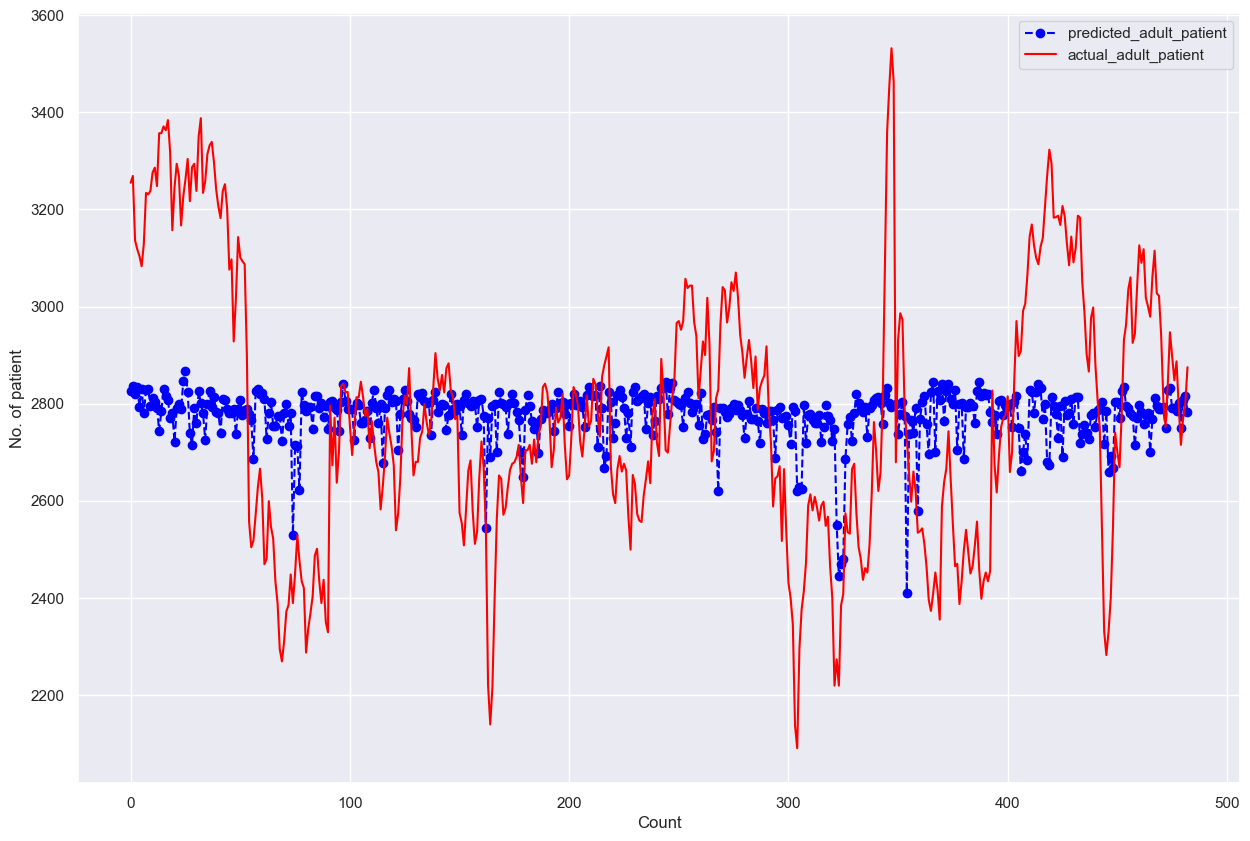

In [19]:
#show the result of degree 1
poly = PolynomialFeatures(degree = 1) 
polyX = poly.fit_transform(X)
X_train, X_test, y_adult_train, y_adult_test = train_test_split(polyX, y_adult, test_size=0.2, random_state=101)
LR_adult = LinearRegression(fit_intercept= True).fit(X_train,y_adult_train)
print('DEGREE', 1, 'Estimated intercept:', LR_adult.intercept_)

predicted_adult_patient = LR_adult.predict(polyX)
df_predicted_adult_patient = pd.DataFrame(predicted_adult_patient,index=y_adult.index,columns = ['predicted_adult_patient'])

df_predicted_adult_patient.plot(figsize=(15,10), color='blue', marker='o', linestyle='dashed')
y_adult.plot(color='red')

plt.legend(['predicted_adult_patient','actual_adult_patient'])  
plt.xlabel("Count")  
plt.ylabel("No. of patient") 
plt.show()

In [20]:
print("Degree 1")
new_df = pd.DataFrame()
new_df['actual_adult_patient'] = list(y_adult)
new_df['predicted_adult_patient'] = predicted_adult_patient
new_df.head()

Degree 1


,actual_adult_patient,predicted_adult_patient
0,3255,2825.002298
1,3269,2836.407633
2,3136,2820.753603
3,3118,2835.007163
4,3104,2793.744666


In [21]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_adult_train,X_train_Sm).fit()
print(ls.summary())

                             OLS Regression Results                            
Dep. Variable:     total adult patient   R-squared:                       0.040
Model:                             OLS   Adj. R-squared:                  0.020
Method:                  Least Squares   F-statistic:                     1.983
Date:                 Fri, 05 May 2023   Prob (F-statistic):             0.0475
Time:                         02:40:29   Log-Likelihood:                -2698.5
No. Observations:                  386   AIC:                             5415.
Df Residuals:                      377   BIC:                             5451.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2612.9178    126.594     20.64

# The last would be the linear regression model of children patient

In [22]:
#THIS is the DEMO of the model with degree 1
poly = PolynomialFeatures(degree = 1) 
polyX = poly.fit_transform(X)

X_train, X_test, y_children_train, y_children_test = train_test_split(polyX, y_children, test_size=0.2, random_state=101)

In [23]:
LR_children = LinearRegression(fit_intercept= True).fit(X_train,y_children_train)
print('Estimated intercept:', LR_children.intercept_)

Estimated intercept: 208.8335309234798


In [24]:
predicted_trained_children_patient = LR_children.predict(X_train)

df_predicted_trained_children_patient = pd.DataFrame(predicted_trained_children_patient,index=list(range(1,len(X_train)+1)),columns = ['predicted_trained_children_patient'])

#----
test_children_patient = LR_children.predict(X_test)
df_test_children_patient = pd.DataFrame(test_children_patient,index=list(range(1,len(X_test)+1)),columns = ['test_children_patient'])
df_predicted_trained_children_patient, df_test_children_patient

(     predicted_trained_children_patient
 1                            207.366655
 2                            209.997718
 3                            200.230485
 4                            184.767928
 5                            200.129613
 ..                                  ...
 382                          206.307818
 383                          223.922951
 384                          200.486025
 385                          195.354256
 386                          195.498048
 
 [386 rows x 1 columns],
     test_children_patient
 1              201.602037
 2              200.518276
 3              205.842815
 4              208.915684
 5              185.839230
 ..                    ...
 93             185.621365
 94             211.258619
 95             172.610896
 96             225.463852
 97             198.124362
 
 [97 rows x 1 columns])

In [25]:
ta=r2_score(predicted_trained_children_patient, y_children_train)
te=r2_score(test_children_patient, y_children_test)
print("DEGREE 1"," || Train R-square =", ta, "||Test R-square =",te)

DEGREE 1  || Train R-square = -17.254452717125623 ||Test R-square = -13.23028991105093


In [26]:
eta = mean_squared_error(predicted_trained_children_patient, y_children_train)
ete = mean_squared_error(test_children_patient, y_children_test)
print("DEGREE 1"," || Train mse =", eta, "||Test mse =",ete)

DEGREE 1  || Train mse = 2722.634916121677 ||Test mse = 2428.9672312495


In [27]:
#Trying PolynomialFeatures from degree 1 to 10
for i in range(1,11):
    poly = PolynomialFeatures(degree = i) 
    polyX = poly.fit_transform(X)
    X_train, X_test, y_children_train, y_children_test = train_test_split(polyX, y_children, test_size=0.2, random_state=101)
    LR_children = LinearRegression(fit_intercept= True).fit(X_train,y_children_train)
    print('DEGREE', i, 'Estimated intercept:', LR_children.intercept_)
    
    predicted_trained_children_patient = LR_children.predict(X_train)
    test_children_patient = LR_children.predict(X_test)
    
    ta=r2_score(predicted_trained_children_patient, y_children_train)
    te=r2_score(test_children_patient, y_children_test)
    print("DEGREE", i," || Train R-square =", ta, "||Test R-square =",te)
    
    eta = mean_squared_error(predicted_trained_children_patient, y_children_train)
    ete = mean_squared_error(test_children_patient, y_children_test)
    print("DEGREE", i," || Train mse =", eta, "||Test mse =",ete)
    

DEGREE 1 Estimated intercept: 208.8335309234798
DEGREE 1  || Train R-square = -17.254452717125623 ||Test R-square = -13.23028991105093
DEGREE 1  || Train mse = 2722.634916121677 ||Test mse = 2428.9672312495
DEGREE 2 Estimated intercept: 72788397012.3111
DEGREE 2  || Train R-square = -3.5032870298348113 ||Test R-square = -3.6826117392296362
DEGREE 2  || Train mse = 2353.895987006294 ||Test mse = 2757.8351423004115
DEGREE 3 Estimated intercept: -7382956428.109254
DEGREE 3  || Train R-square = -0.6055127972936052 ||Test R-square = 0.006587173389704937
DEGREE 3  || Train mse = 2146.5724230404903 ||Test mse = 586148.9193336752
DEGREE 4 Estimated intercept: -1381.5447623897232
DEGREE 4  || Train R-square = -0.016966678110520883 ||Test R-square = -0.013130254909790251
DEGREE 4  || Train mse = 1447.9706575505616 ||Test mse = 648450034.287829
DEGREE 5 Estimated intercept: 84039.0187126144
DEGREE 5  || Train R-square = 0.5878992435772477 ||Test R-square = -0.010422142076663254
DEGREE 5  || Train

DEGREE 2 Estimated intercept: 72788397012.3111


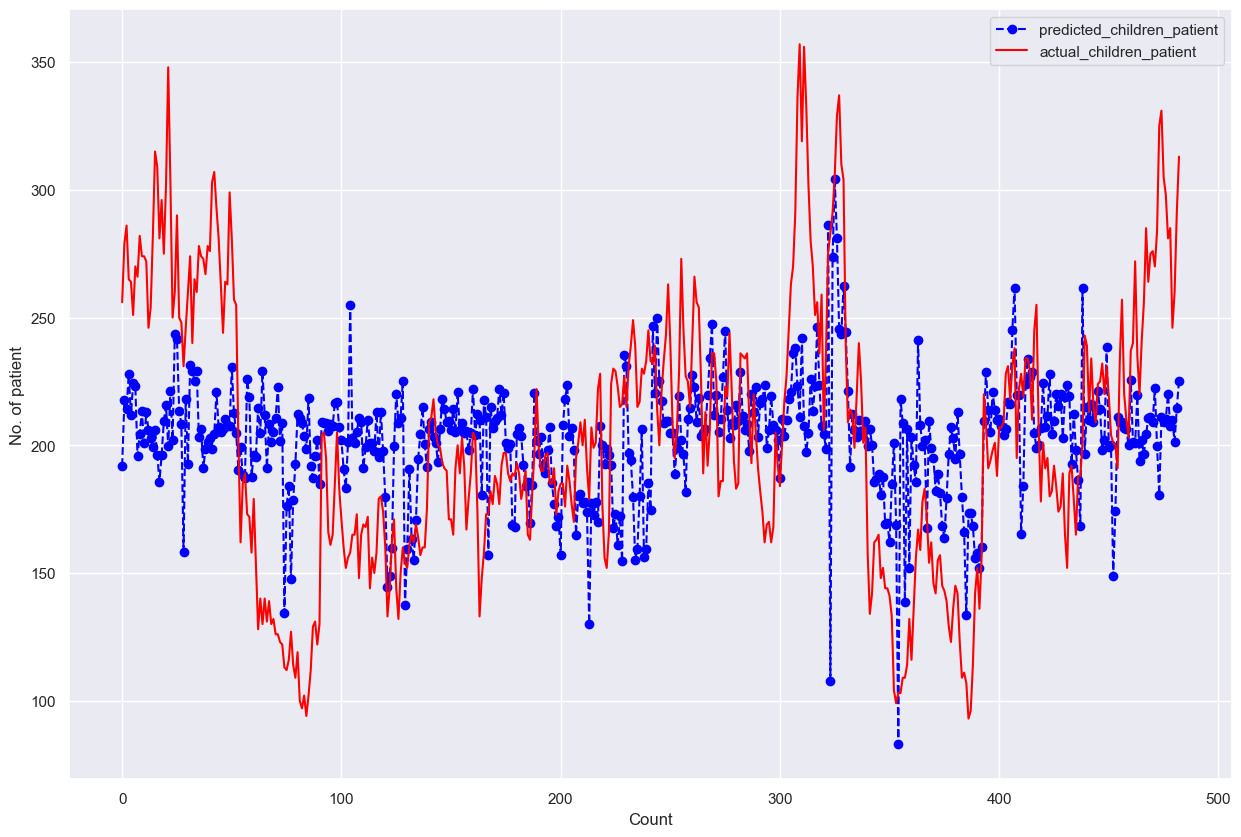

In [28]:
#show the result of degree 2
poly = PolynomialFeatures(degree = 2) 
polyX = poly.fit_transform(X)
X_train, X_test, y_children_train, y_children_test = train_test_split(polyX, y_children, test_size=0.2, random_state=101)
LR_children = LinearRegression(fit_intercept= True).fit(X_train,y_children_train)
print('DEGREE', 2, 'Estimated intercept:', LR_children.intercept_)

predicted_children_patient = LR_children.predict(polyX)
df_predicted_children_patient = pd.DataFrame(predicted_children_patient,index=y_children.index,columns = ['predicted_children_patient'])


df_predicted_children_patient.plot(figsize=(15,10), color='blue', marker='o', linestyle='dashed')
y_children.plot(color='red')

plt.legend(['predicted_children_patient','actual_children_patient'])  
plt.xlabel("Count")  
plt.ylabel("No. of patient") 
plt.show()

In [29]:
print("Degree 2")
new_df = pd.DataFrame()
new_df['actual_children_patient'] = list(y_children)
new_df['predicted_children_patient'] = predicted_children_patient
new_df.head()

Degree 2


,actual_children_patient,predicted_children_patient
0,256,191.940308
1,279,217.592941
2,286,214.274246
3,265,227.910873
4,264,211.802475


In [30]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_children_train,X_train_Sm).fit()
print(ls.summary())

                              OLS Regression Results                              
Dep. Variable:     Total children patient   R-squared:                       0.181
Model:                                OLS   Adj. R-squared:                  0.096
Method:                     Least Squares   F-statistic:                     2.141
Date:                    Fri, 05 May 2023   Prob (F-statistic):           0.000261
Time:                            02:40:51   Log-Likelihood:                -2046.0
No. Observations:                     386   AIC:                             4166.
Df Residuals:                         349   BIC:                             4312.
Df Model:                              36                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       